In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

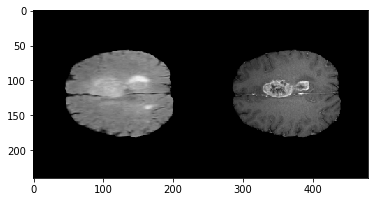

In [2]:
EPS = 1e-9
x = plt.imread('flair_100.png')
y = plt.imread('t1ce_100.png')

y = y*255
x = x *255 

plt.imshow(np.hstack((x,y)), cmap='gray')

In [3]:
# Compute MI

counts, _, _ = np.histogram2d(x.ravel(), y.ravel(), bins=256)

p_xy = counts/counts.sum()
p_x = np.sum(p_xy, axis=1)
p_y = np.sum(p_xy, axis=0)

p_xy[p_xy<EPS] = EPS
p_x[p_x<EPS] = EPS
p_y[p_y<EPS] = EPS

mi = p_xy * (np.log(p_xy) - np.log(p_x) - np.log(p_y))
mi = mi.sum().sum()

print(mi)

3.080506167071995


Compute joint from scratch and use that for MI calculation

In [4]:
x1d = x.ravel().astype(np.uint8)
y1d = y.ravel().astype(np.uint8)

bins=256
hist1 = np.zeros((bins,1))
hist2 = np.zeros((bins,1))

for i in range(bins-1):
    hist1[i] = np.logical_and(x1d >= i, x1d < i+1).sum()
    hist2[i] = np.logical_and(y1d >= i, y1d < i+1).sum()

joint = np.zeros((bins,bins))
for i in range(bins):
    for j in range(bins):
        joint[i,j] = hist1[i] + hist2[j]

joint /= (240*240*2) # image size

In [5]:
p_xy = joint 
p_xy = counts/counts.sum()
p_x = np.sum(p_xy, axis=1)
p_y = np.sum(p_xy, axis=0)

p_xy[p_xy<EPS] = EPS
p_x[p_x<EPS] = EPS
p_y[p_y<EPS] = EPS

mi = p_xy * (np.log(p_xy) - np.log(p_x) - np.log(p_y))
mi = mi.sum().sum()

print(mi)

3.080506167071995
